# Linear Classificator with TensorFlow

Создание двух массивов точек с одинаковыми ковариационными матрицами и разными средними значениями.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=np.array([[1, 0.5], [0.5, 1]]),
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=np.array([[1, 0.5], [0.5, 1]]),
    size=num_samples_per_class
)

Объединение массивов в один и создание массива целей.

In [2]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((
np.zeros((num_samples_per_class, 1), dtype="float32"),
    np.ones((num_samples_per_class, 1), dtype="float32"))
)

Построение графика.

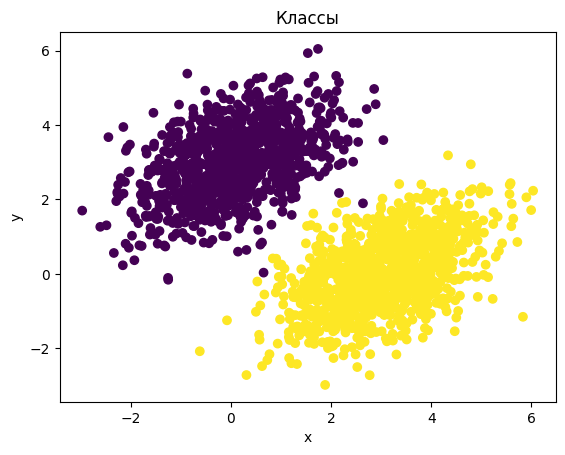

In [3]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Классы')
plt.show()

Создание весов и смещений.

In [4]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

Функция прямого прохода.

In [5]:
def feed_forward(input_data):
    return tf.matmul(input_data, W) + b

Функция потерь.

In [6]:
def square_loss(target_data, predictions):
    per_sample_losses = tf.square(target_data - predictions)
    return tf.reduce_mean(per_sample_losses)

Функция обучения.

In [7]:
learning_rate = 0.1

def training_step(input_data, target_data):
    with tf.GradientTape() as tape:
        predictions = feed_forward(input_data)
        pred_loss = square_loss(predictions, target_data)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(pred_loss, [W, b])  # WRT = With Respect To (По отношению)
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return pred_loss

Обучение.

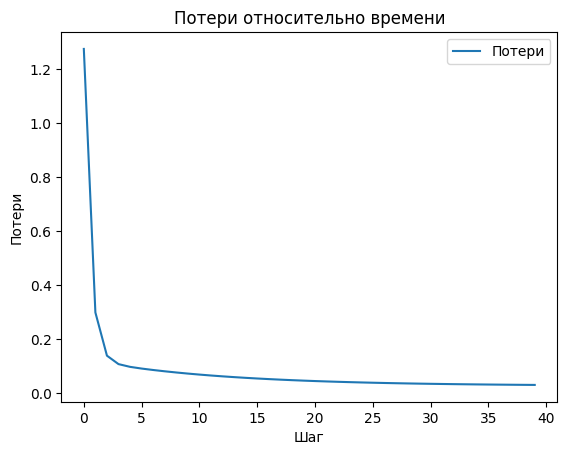

In [8]:
loss_array = []
for step in range(40):
    loss = training_step(inputs, targets)
    loss_array.append(loss)

plt.plot(loss_array, label='Потери')
plt.xlabel('Шаг')
plt.ylabel('Потери')
plt.title('Потери относительно времени')
plt.legend()
plt.show()

Построение линейной функции классификации.

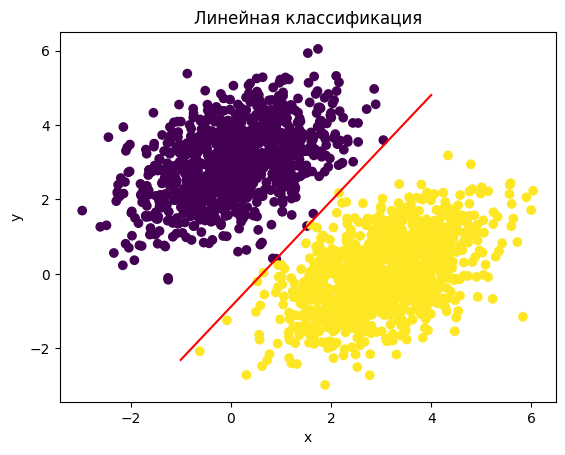

In [9]:
x = np.linspace(-1, 4, 100)  # Равномерная генерация точек в диапазоне от -1 до 4
y = - W[0] / W[1] * x + (0.5 - b) / W[1]  # Так как W1 * x + W2 * y + b = 0.5 (Диапазон от 0 до 1 => <> 0.5)

predictions = feed_forward(inputs)

plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная классификация')
plt.show()